In [3]:
# Importing packages :D

import ugradio
import numpy as np
import matplotlib.pyplot as plt

### Advice from the lab instructions:
    1. Save all metadata necessary to reconstruct observations
    2. Verify that rotation matricies yield correct pointings and that gain calibration is accurat.
    Build confidence through internal consistency checks. 
    3. Think critically about assumptions and approximatinos. How do pointing accuracy and aperture coverage 
    affect your calibration? Critically analyze these and other factors in your report. 
    4. Error bars. Error matters. Anything without error doesn't mean shit. 

### Lab goals: 
    1. Time: Accurate conversion between UTC, PST, LST, and JD. 
    2. Pointing: Use rotation matricies to convert among spherical coordinate systems. 
    3. Measurement: Measure the 21-cm line power spectrum from Milky Way hydrogen at a defined location. 
    4. Calibration: Calibrate observations to an absolute scale, remove systematic instrumental effects, and 
    apply noise-reduction techniques. 
    5. Doppler Correction: Produce spectra with velocities calibrated relative to a standard reference frame. 
    6. Fitting: Fit spectra with Gaussian components to localize celestial structures.
    7. Impedance: Terminate transmission lines to minimize reflections. 
    8. Propagation: Derive propagation velocities for radio waves in coaxial cables. 
    9. Error Analysis: Use linear and non-linear least-squares methods to fit models and estimate errors. 

In [9]:
# Useful time measurements found in lab mixer 

local_now = ugradio.timing.local_time() # current local time string
ut_now = ugradio.timing.utc()           # current UTC string
un_now = ugradio.timing.unix_time()     # seconds since 1 January 1970
jd_now = ugradio.timing.julian_date()   # current JD
lst_now = ugradio.timing.lst()          # current LST at NCH
# lst_jd = ugradio.timing.lst(jd)         # LST for specified JD 
# ut_jd = ugradio.timing.unix_time(jd)    # s since 1/1/1970 for given JD
# jd_ut = ugradio.timing.julian_date(ut)  # JD for given unix time 

In [10]:
local_now
un_now

1770950216.0334332

In [1]:
# Need to set the sample rate correctly and use USB-C cables to collect data through RPi without losing any samples


/tmp/ipykernel_3997/3941340091.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f, 10*np.log10(power)) # converting x axis to khz and y axis to dB instead of dBm


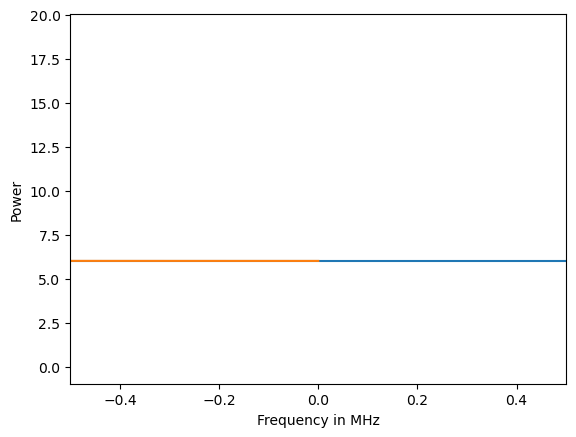

In [19]:
birdie3 = np.load("birdietest3_1420.405.npz")

bird3 = birdie3["arr_1"]


# Manipulating data
fs = 3.2e6
N = 2048
shifted_bird = np.fft.fftshift(np.fft.fft(bird3[5]))
power = np.abs(shifted_bird) ** 2

f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))

# Plotting data
plt.figure()
plt.plot(f, 10*np.log10(power)) # converting x axis to khz and y axis to dB instead of dBm
plt.xlim(-0.5, 0.5)
plt.xlabel("Frequency in MHz")
plt.ylabel("Power")
plt.show()

In [20]:
# Expecting to see peaks around 185 and 290 kHz, but nothing is seen.

/tmp/ipykernel_3997/2853621095.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f, 10*np.log10(power)) # converting y axis to dB instead of dBm


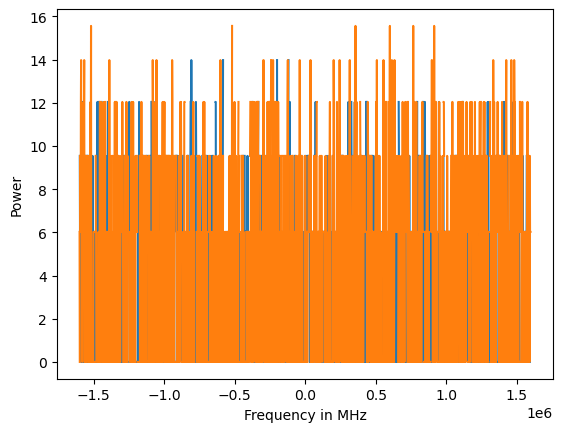

In [22]:
birdie5 = np.load("birdietest5_1420.405.npz")

bird5 = birdie5["arr_1"]


# Manipulating data
fs = 3.2e6
N = 2048
shifted_bird = np.fft.fftshift(np.fft.fft(bird5[5]))
power = np.abs(shifted_bird) ** 2

f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))

# Plotting data
plt.figure()
plt.plot(f, 10*np.log10(power)) # converting y axis to dB instead of dBm
# plt.xlim(1415, 1425)
plt.xlabel("Frequency in MHz")
plt.ylabel("Power")
plt.show()

/tmp/ipykernel_3997/3197009684.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f / 1e3, 10*np.log10(power)) # 1e3 is unit conversion from MHz to kHz


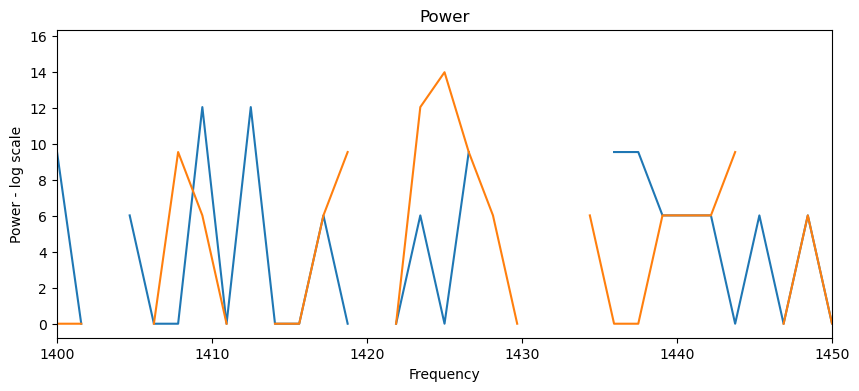

None


In [46]:
# Quick FT Power Plot
birdie5 = np.load("birdietest5_1420.405.npz")

bird5 = birdie5["arr_1"]

fs = 3.2e6
N = len(bird5[5])

plt.figure(figsize=(10,4))
shifted_ft = np.fft.fftshift(np.fft.fft(bird5[5]))
power = np.abs(shifted_ft) ** 2
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))

plt.plot(f / 1e3, 10*np.log10(power)) # 1e3 is unit conversion from MHz to kHz
plt.xlim(1400, 1450)
plt.xlabel("Frequency")
plt.ylabel("Power - log scale")
plt.title("Power")
print(plt.show())


/tmp/ipykernel_3997/3055282815.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f / 1e3, 10*np.log10(power)) # 1e3 is unit conversion from MHz to kHz


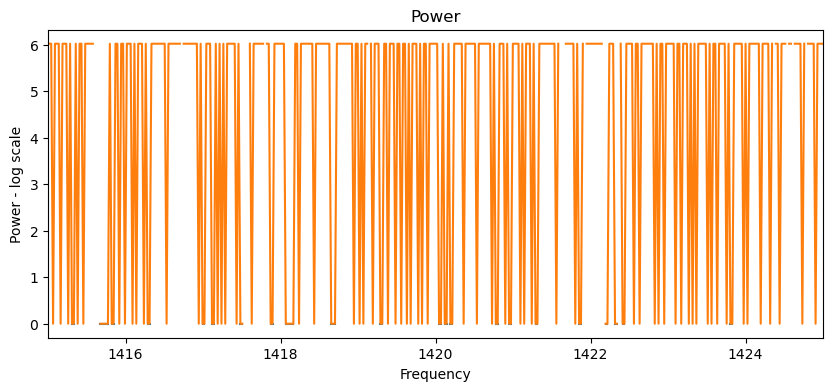

None


In [47]:
# Quick FT Power Plot
birdie6 = np.load("birdietest6_1420.405.npz")

bird6 = birdie6["arr_1"]

fs = 3.2e6
N = len(bird6[3])

plt.figure(figsize=(10,4))
shifted_ft = np.fft.fftshift(np.fft.fft(bird6[3]))
power = np.abs(shifted_ft) ** 2
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))

plt.plot(f / 1e3, 10*np.log10(power)) # 1e3 is unit conversion from MHz to kHz
plt.xlim(1415, 1425)
plt.xlabel("Frequency")
plt.ylabel("Power - log scale")
plt.title("Power")
print(plt.show())


/tmp/ipykernel_3997/2890437862.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(f / 1e3, 10*np.log10(power)) # 1e3 is unit conversion from MHz to kHz


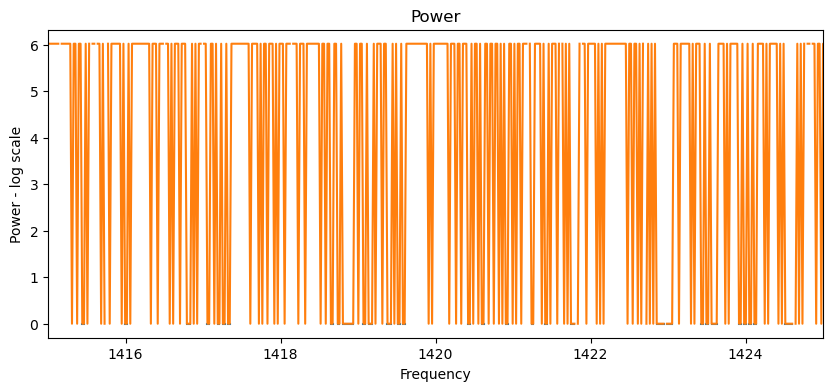

None


In [48]:
# Trying to plot historgram to see Gaussian shape to see clipping

birdie7 = np.load("birdietest7_1420.405.npz")

bird7 = birdie7["arr_1"]

fs = 2.9e6
N = len(bird7[3])

plt.figure(figsize=(10,4))
shifted_ft = np.fft.fftshift(np.fft.fft(bird7[3]))
power = np.abs(shifted_ft) ** 2
f = np.fft.fftshift(np.fft.fftfreq(N, d=1/fs))

plt.plot(f / 1e3, 10*np.log10(power)) # 1e3 is unit conversion from MHz to kHz
plt.xlim(1415, 1425)
plt.xlabel("Frequency")
plt.ylabel("Power - log scale")
plt.title("Power")
print(plt.show())
birdie7 = np.load("birdietest7_1420.405.npz")

bird7 = birdie7["arr_1"]


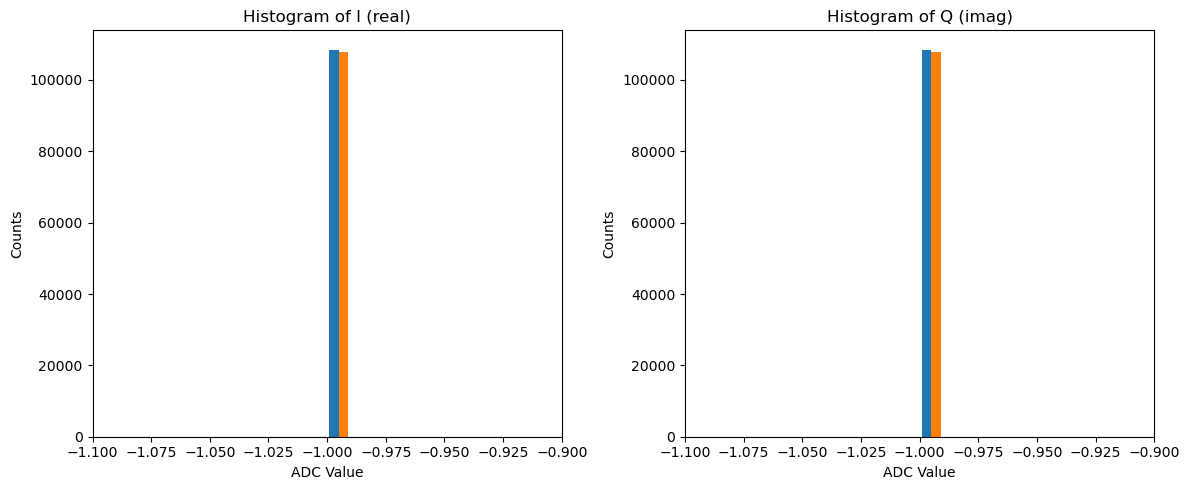

In [49]:
# Trying to plot historgram to see Gaussian shape to see clipping

birdie7 = np.load("birdietest7_1420.405.npz")

bird7 = birdie7["arr_1"]

# Separate real and imaginary
I = np.real(bird7[3])
Q = np.imag(bird7[3])

# Plotting 

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.hist(I, bins=100)
plt.xlim(-1.1, -0.9)
plt.title("Histogram of I (real)")
plt.xlabel("ADC Value")
plt.ylabel("Counts")

# Plotting real data
plt.subplot(1, 2, 2)
plt.hist(I, bins=100)
plt.xlim(-1.1, -0.9)
plt.title("Histogram of Q (imag)")
plt.xlabel("ADC Value")
plt.ylabel("Counts")
plt.tight_layout()


plt.show()

